In [4]:
import sys
sys.path.insert(0, '../')


In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

from mousestyles import data
from path_index import path_index
from pa

In [7]:
movement = data.load_movement(1,2,1)

In [8]:
movement.head()

,t,x,y,isHB
0,51089.760,-11.575,40.000,False
1,51089.934,-11.575,40.000,False
2,51090.114,-11.755,40.000,False
3,51093.634,-11.934,39.924,False
4,51594.914,-11.900,38.923,False


In [9]:
paths_sep = path_index(movement, 1, 1)

In [15]:
def compute_distances(path_obj):
    indices = path_obj.index[:len(path_obj)-1]
    out = [np.linalg.norm(path_obj.loc[i,'x':'y'] - path_obj.loc[i+1,'x':'y']) for i in indices]
    return(out)

def take_time_diffs(path_obj):
    indices = path_obj.index[:len(path_obj)-1]
    out = [path_obj.loc[i+1, 't'] - path_obj.loc[i, 't'] for i in indices]
    return(out)

def compute_speeds(distances, time_diffs):
    if len(distances) is not len(time_diffs):
        raise ValueError("lengths of distances and time_diffs must be same")
    
    ## caution: time_diff should not contain 0.
    
    out = [d/t for d,t in zip(distances, time_diffs)]
    return(out)

def compute_accelerations(speeds, timestamps):
    if len(speeds) is not len(timestamps)-1:
        raise ValueError("lengths of speeds must be the length of timestamps minus 1")
        
    ## caution: timestamps shoud not contain same time at adjacet rows
    
    speeds_diff = [ x - y for x,y in zip(speeds[:len(speeds)], speeds[1:])] 
    time_diffs = [ x - y for x,y in zip(timestamps[:len(timestamps)-1], timestamps[2:])]
    out = [v/t for v,t in zip(speeds_diff, time_diffs)]
    return(out)



In [16]:
def unit_vector(vector):
    r""" Returns the unit vector of the vector.  """
    return(vector / np.linalg.norm(vector))

def angle_between(v1, v2):
    r""" Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
    
def compute_angles(path_obj, radian):
    if type(radian) != bool:
        raise TypeError("radian must be bool")
    indices = path_obj.index[:len(path_obj)-1]
    vectors = [path_obj.loc[i + 1,'x':'y'] - path_obj.loc[i,'x':'y'] for i in indices]
    out = [angle_between(v1,v2) for v1,v2 in zip(vectors[1:], vectors[:len(vectors)])]
    if not radian:
        out = [ 180 - theta * 180 / math.pi for theta in out]
    return(out)


In [17]:
YLower = 1.0; YUpper = 43.0; XUpper = 3.75; XLower = -16.25
def plot_path(sep, title):
    p = movement[sep[0]:sep[1]+1]
    plt.plot(p['x'], p['y'])
    plt.xlabel('x-coordinate')
    plt.xlim(XLower, XUpper)
    plt.ylabel('y-coordinate')
    plt.ylim(YLower, YUpper)
    plt.title(title)

In [18]:
def show_results(sep):
    path = movement[sep[0]:sep[1]+1]
    distances  = compute_distances(path)
    time_diffs = take_time_diffs(path)
    speeds     = compute_speeds(distances, time_diffs)
    accels     = compute_accelerations(speeds, path.t)
    angles     = compute_angles(path, False)
    accels.append(None)
    angles.append(None)
    out = {'distances' : distances, 'time_diff' : time_diffs, 'speeds' : speeds ,
           'accelaration' : accels, 'angles' : angles}
    out = pd.DataFrame(out)
    plot_path(sep, 'path')
    return(out)


,accelaration,angles,distances,speeds,time_diff
0,2.824859,NaN,0.00,0,0.174
1,NaN,NaN,0.18,1,0.180


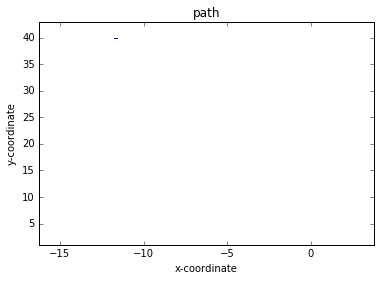

In [19]:
show_results(paths_sep[0])

,accelaration,angles,distances,speeds,time_diff
0,-26.433336,30.463625,1.290769,12.907692,0.10
1,NaN,NaN,0.577821,1.805690,0.32


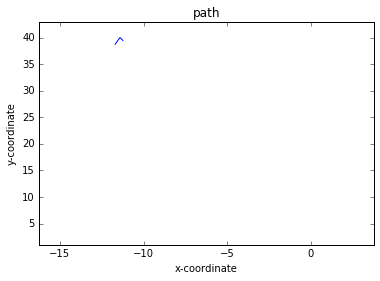

In [20]:
show_results(paths_sep[1])

,accelaration,angles,distances,speeds,time_diff
0,151.885262,4.708398,1.019071,25.476779,0.04
1,-78.162793,12.652102,1.505104,37.627600,0.04
2,64.991155,15.944703,1.294388,3.235971,0.40
3,22.788203,3.644068,1.273283,31.832079,0.04
4,-32.290741,13.446348,1.346205,33.655135,0.04
5,NaN,NaN,1.309819,1.364394,0.96


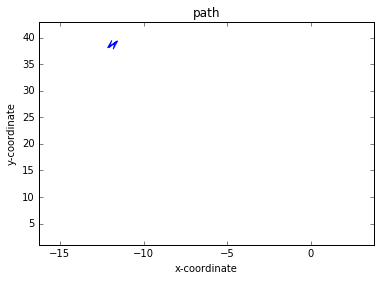

In [21]:
show_results(paths_sep[2])

In [24]:
movement[paths_sep[3][0]:paths_sep[3][1]+1]

,t,x,y,isHB
129,57087.854,-12.243,38.211,False
130,57087.894,-11.802,39.178,False
131,57088.574,-11.928,37.960,False


,accelaration,angles,distances,speeds,time_diff
0,-34.402184,18.609199,1.062812,26.570308,0.04
1,NaN,NaN,1.224500,1.800735,0.68


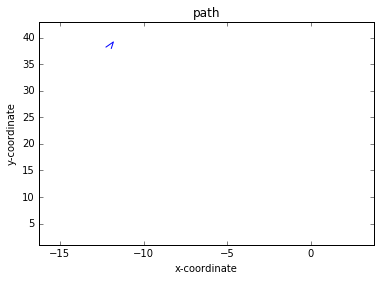

In [25]:
show_results(paths_sep[3])

,accelaration,angles,distances,speeds,time_diff
0,-65.886743,21.150844,1.219584,30.489599,0.04
1,31.602007,29.264517,1.070523,2.817166,0.38
2,142.252645,11.426514,1.003323,16.722050,0.06
3,25.895248,6.645117,1.237893,30.947314,0.04
4,-110.799023,6.170423,1.320757,33.018934,0.04
5,48.121949,5.726128,1.316342,21.939032,0.06
6,4.851268,4.930015,1.070049,26.751227,0.04
7,NaN,NaN,1.085573,27.139328,0.04


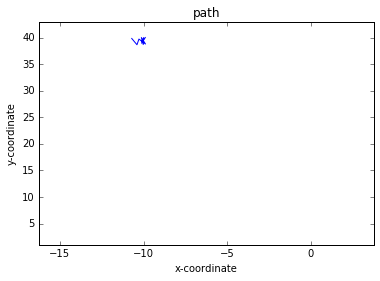

In [26]:
show_results(paths_sep[4])

,accelaration,angles,distances,speeds,time_diff
0,1.114138,10.345570,1.227789,2.557893,0.48
1,-1.885123,9.197286,1.103745,3.449203,0.32
2,-0.214164,124.750010,1.002565,1.790295,0.56
3,0.165623,179.753918,1.009150,1.529015,0.66
4,2.357960,173.554691,1.005945,1.734388,0.58
5,-2.195121,144.591621,1.053425,3.762233,0.28
6,-0.717973,164.973735,1.005092,2.093942,0.48
7,0.227340,163.310935,1.001677,1.088779,0.92
8,3.306886,142.749696,1.019950,1.457071,0.70
9,NaN,NaN,1.095730,4.565543,0.24


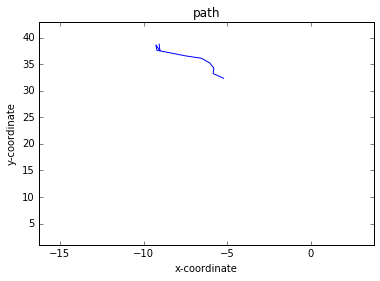

In [27]:
show_results(paths_sep[5])

,accelaration,angles,distances,speeds,time_diff
0,56.657841,173.032001,1.034234,12.927925,0.08
1,77.247742,165.771306,1.251601,20.860023,0.06
2,-118.308838,174.434438,1.143392,28.584797,0.04
3,190.627204,168.748023,1.005235,16.753913,0.06
4,-16.947216,164.646354,1.432665,35.816634,0.04
5,-39.652254,168.748714,1.378434,34.460856,0.04
6,84.718338,149.759721,1.251547,31.288676,0.04
7,-75.123184,157.691018,1.522646,38.066143,0.04
8,-3.731422,176.475275,1.282252,32.056288,0.04
9,14.902817,156.280230,1.270311,31.757775,0.04


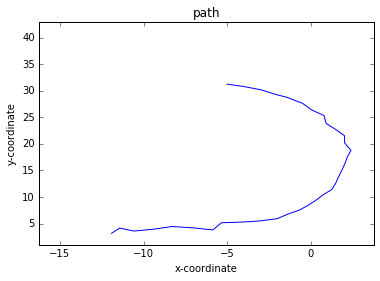

In [28]:
show_results(paths_sep[6])

In [29]:
movement[paths_sep[6][0]:paths_sep[6][1]]

,t,x,y,isHB
178,57329.314,-5.014,31.230,True
179,57329.394,-4.068,30.812,True
180,57329.454,-2.993,30.171,True
181,57329.494,-2.185,29.362,True
182,57329.554,-1.409,28.723,True
183,57329.594,-0.502,27.614,True
184,57329.634,0.057,26.354,True
185,57329.674,0.778,25.331,True
186,57329.714,0.909,23.814,True
187,57329.754,1.496,22.674,True
